# Natural Language Processing pipeline for solving real-world problems 

## Abstract

This study describes how using sentiment analysis can be used to detect polarity (e.g. a positive, negative or neutral opinion) within the text, document, paragraph, sentence or clause. It examines the fundamental concepts of sentiment analysis, their implementation and application. 

We performed appropriate preparation of a dataset and compared the performance of two different techniques which are commonly used for sentiment analysis [4]. The performance of the Machine Learning models were evaluated using various evaluation metrics and the performance is compared to a previous published method.

The study concluded that the Logistic Regression model had the highest F1 score of 0.773 with Linear SVC a close second with an F1 score of 0.764. The results were similar to another study performed on the same dataset [7].

## Introduction and literature review

Natural Language Processing (NLP), a branch of Artificial Intelligence that enables computers to understand and use human language. It is one of the most sought-after techniques that makes communication easier between humans and computers [2].

Sentiment analysis involves using NLP to identify and extract subjective information from text. It is important for businesses to understand the social sentiment of their brand, product or service whilst monitoring online conversations. Some of the key benefits of measuring the attitude and emotions of these conversations could be to gain customer insights, market research and strategies, and to understand customer service interactions. 

Though it may seem easy on paper, Sentiment Analysis is a tricky subject. A text may contain multiple sentiments all at once. For instance, “The acting was good, but the movie could have been better”. This sentence consists of two polarities! [4].

The aim of this study is to use the Sentiment140 dataset available on Kaggle to apply sentiment analysis techniques to develop and test models to classify the text into three categories, positive, negative and neutral. The measures to assess the best model in this experiment, which used a single dataset for each method, were accuracy and  F1 score. 


**Reviewing the Kaggle notebook Twitter Sentiment Analysis Custom Model [7] **

This Kaggler performed sentiment analysis on three datasets. After cleaning the datasets they lemmatized and vectorized the data before using machine learning algorithms to build the prediction models. After tuning the models with GridSearchCV these were the results:

*Figure 1: shows the models results*

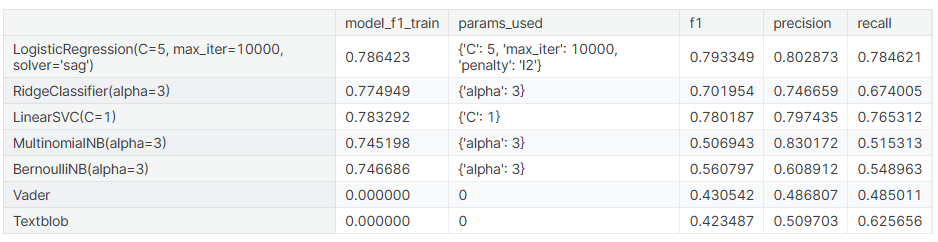


TexBlob and VADAR are out of the box models used for comparison.


We can see that the Logistic Regression model had the highest F1 score of 0.7933 with Linear SVC a close second with an F1 score of 0.7802.

## Dataset description

The dataset being used in this report is the **Sentiment140 dataset (1,600,000 tweets)**. It contains 1,600,000 tweets extracted downloaded from Kaggle:
https://www.kaggle.com/datasets/milobele/sentiment140-dataset-1600000-tweets

The tweets have been annotated **(0=Negative, 2=Neural, 4=Positive)** and they can be used to detect sentiment.
 
It contains the following fields:
1. **sentiment**: the polarity of the tweet *(0 = negative, 2=neutral, 4 = positive)*
2. **id**: The id of the tweet *(2087)*
3. **date**: the date of the tweet *(Sat May 16 23:58:44 UTC 2009)*
4. **flag**: The query (lyx). If there is no query, then this value is NO_QUERY.
5. **user**: the user that tweeted *(robotickilldozr)*
6. **text**: the text of the tweet *(Lyx is cool)*

We require only the **sentiment** and **text** fields, so we have discarded the rest.

### Data ethics and legal considerations

It is our duty and obligation to obey the law in any data projects. We must ensure the project’s compliance with General Data Protection Regulation (GDPR), Data Protection Act (DPA) 2018 (accountability) and the European Artificial Intelligence Act 2023.
Insights from new technology are only as good as the data and practices used to create them. We must ensure that the data for the project is accurate, representative, proportionally used, of good quality, and that we are able to explain its limitations.

(Appendix 9.1: K2)

### Challenges

- The training data isn't perfectly categorised as it has been created by tagging the text according to the emoji present. So, any model built using this dataset may have lower than expected accuracy, since the dataset isn't perfectly categorised.

- A text may contain multiple sentiments all at once -“The acting was good, but the movie could have been better”. This sentence consists of two polarities. 

- A text could contain sarcasm - "thanks FNB, now I cant open my account cause its frozen"






## Methods

This study uses the following NLP pipeline approach:

*Figure 2: shows the proposed NLP pipeline [3]*

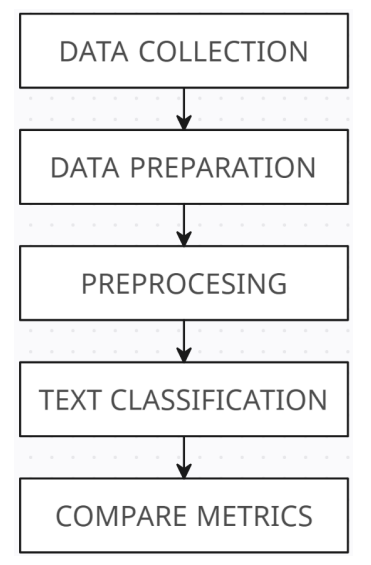

We are going to compare two sentiment analysis methods to determine which is the best method for predicting the sentiment/polarlity of each tweet in this dataset.

#### Method 1 – Machine Learning algorithms 

- LinearSVC
- Naive Bayes (Bernoulini and Multinomial)
- KNeighbors Classifier
- Logistic Regression


#### Method 2 – Out of the box models

- TextBlob [5]

- VADER (Valence Aware Dictionary for Sentiment Reasoning) [4].

#### Metrics
This study has used the following measures, suitable for sentiment analysis, to analyse the results.  
- Accuracy
- F1 score

## Experimental setup

### Python set up

In [1]:
# Set up libraries
import opendatasets as od
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Data processing
import re, string
#!pip install emoji
import emoji
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chees\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Suppress warnings
import warnings;
warnings.filterwarnings('ignore');

In [3]:
# Set up plot style for Seaborn
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

<Figure size 640x480 with 0 Axes>

### Reproducability:


Reproducibility is a very important concept that ensures that anyone who re-runs the code gets the exact same outputs.

In [4]:
import random
random.seed(42)

### Import datasets:

In [5]:
# Get a list of all files in the directory
directory_path = "data"
files = os.listdir(directory_path)
print(files)

['testdata.manual.2009.06.14.csv', 'training.1600000.processed.noemoticon.csv']


In [6]:
# Read in datasets and label columns
df = pd.read_csv("data/training.1600000.processed.noemoticon.csv"
                 ,encoding="Latin-1" 
                 ,names=["sentiment","id", "date","flag", "user", "text"])

df_test  = pd.read_csv("data/testdata.manual.2009.06.14.csv"
                       ,encoding="Latin-1" 
                       ,names=["sentiment","id", "date","flag", "user", "text"])

NOTE: UTF-8 encoding does not work on the dataset when loading it with pandas 'read_csv' function. This lead to the use of 'ISO-8859-1'/latin-1 encoding.

Some special characters like apostrophes will be turned into '\x92', which will be taken care of during the data cleaning process.

### Review the train dataset:

In [7]:
# Understand the structure of the data frame
print("The dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print("")
print(df.info())

The dataset has 1600000 rows and 6 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None


The data structure of the training dataset is as expected.

In [8]:
df['sentiment'].value_counts()

sentiment
0    800000
4    800000
Name: count, dtype: int64

The number of sentiments in the training dataset are as expected however there are no neutral (sentiment=2) sentiments in this dataset.

### Review the test dataset:

In [9]:
# Understand the structure of the data frame
print("The dataset has {} rows and {} columns".format(df_test.shape[0], df.shape[1]))
print("")
print(df_test.info())

The dataset has 498 rows and 6 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  498 non-null    int64 
 1   id         498 non-null    int64 
 2   date       498 non-null    object
 3   flag       498 non-null    object
 4   user       498 non-null    object
 5   text       498 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.5+ KB
None


In [10]:
df_test['sentiment'].value_counts()

sentiment
4    182
0    177
2    139
Name: count, dtype: int64

### Dataset summary

The tweets in the test dataset has been categorised into three classes:
- 0:negative
- 2:neutral
- 4:positive

However, the training dataset provided only has categories 0 (negative) and 4 (positive), both of which are balanced with 800000 tweets each with no missing values. As the training data does not include neutral tweets we have a imbalanced dataset.

The test dataset is small and has the additional sentiment category 2 (neutral) which is not in the training dataset. 

If the model is trained only on sentiments 0 and 4, it won't have seen examples of sentiment 2 during training. Therefore, it won't have learnt to recognise this category. When the model encounters sentiment 2 in the test data, it is likely to misclassify these tweets as either sentiment 0 or 4. This will also affect the performance metrics and may provide misleading results.

### Data preparation

For efficiency, we will keep a quarter of the tweets from the dataset.

In [11]:
data_pos = df[df['sentiment'] == 4]
data_neg = df[df['sentiment'] == 0]

data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

df = pd.concat([data_pos, data_neg])

In [12]:
# Keep the columns required
df_text = df[['sentiment','text']]

display(df_text.head(10))

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just bu...
800006,4,@r_keith_hill Thans for your response. Ihad al...
800007,4,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [13]:
display(df_text.tail(10))

,sentiment,text
19990,0,@TyPie I think I am going to seek out more thi...
19991,0,@Rogerthatv2 Not looking hopeful
19992,0,@2Hood4Hollywood I know I'm sorry...I got cau...
19993,0,It's so warm today! And my external hard drive...
19994,0,I am stuck in the city y is the holland tunnel...
19995,0,"Not much time off this weekend, work trip to M..."
19996,0,One more day of holidays
19997,0,feeling so down right now .. i hate you DAMN H...
19998,0,"geez,i hv to READ the whole book of personalit..."
19999,0,I threw my sign at donnie and he bent over to ...


To make the processing easier to understand we will change the **sentiment** field so that it has new values to reflect the sentiment. **(0 = negative, 4 = positive)**

In [14]:
# Replacing the values to ease understanding.
sentiment_map = {0: 'negative', 4: 'positive'}

# Use the map function to replace values
df_text['sentiment'] = df_text['sentiment'].map(sentiment_map)

df_text['sentiment'].value_counts()

sentiment
positive    20000
negative    20000
Name: count, dtype: int64

In [15]:
df_text.head()

,sentiment,text
800000,positive,I LOVE @Health4UandPets u guys r the best!!
800001,positive,im meeting up with one of my besties tonight! ...
800002,positive,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,positive,Being sick can be really cheap when it hurts t...
800004,positive,@LovesBrooklyn2 he has that effect on everyone


### Text cleaning

Text cleaning is an essential part of the NLP process where all non-textual information is removed to ensure the data remains free from any noise.

#### Impurity check before cleaning

In [16]:
def impurity(text, min_len=10):
    """returns the share of suspicious characters in a text"""
    pattern = r'[&#<>{}\[\]\\]'
    if text == None or len(text) < min_len:
        return 0
    else:
        return len(re.compile(pattern).findall(text))/len(text)

# Use the first text to test the impurity function
#text = df_text.loc[0, "text"]
#print(text)
#print("")
#print("Impurity score is:", impurity(text))

In [17]:
# Check impurity:
pd.options.display.max_colwidth = 50 ###

# Add new column to data frame
df_text['impurity_before'] = df_text['text'].apply(lambda x: impurity(x, min_len=10))

# get the top 3 records
top_records = df_text[['text', 'impurity_before']].sort_values(by='impurity_before', ascending=False).head(30)

display(top_records.head(10))

,text,impurity_before
7379,@ShannonHerod Sending {{hugs}},0.129032
3434,@danielhcwong Taylor 814ce --&gt; #&amp;$(#&am...,0.114650
9782,mercedez benz !! i have electrical probems ...,0.101124
5023,i am soo tired [sigh],0.090909
6860,Its F@#&amp;ing snowing!,0.080000
819558,@caroardilla &quot;A&quot; &quot;A&quot; all t...,0.075472
103,watching &quot;House&quot;,0.074074
819166,watching &quot;The Prince &amp; Me&quot;,0.073171
16026,awww #asot400,0.071429
805235,[late] Good Morning Everyone,0.068966


#### Removing stop words

In [18]:
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Stopwords are the English words which usually do not add much meaning to a sentence and are usually removed from the text. 

However some of them provide sentiment (e.g. "don't", "not", "wasn't") so we will not remove them. The other stop words can safely be ignored without sacrificing the meaning of the sentence. (e.g. "the", "he", "have").

#### Clean text

The text cleaning tasks are:

 - Lower Casing: Each text is converted to lowercase.
 - Replacing URLs: Links starting with "http" or "https" or "www" are replaced by "URL".
 - Replacing Emojis: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")
 - Replacing usernames/mentions: Replace @Usernames with word "USER". (eg: "@Kaggle" to "USER")
 - Replace words prefixed with a hashtag with "NAME"
 - Remove remaining hashtags
 - Removing Non-Alphabets: Replacing characters except Digits and Alphabets with a space.
 - Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")
 
 
 (Appendix 9.1: K3, S1, S2, S3, S5)

In [19]:
# Test emoji
text_with_emojis = "Python is fun 🐍 👍. I love programming ❤️!"
demojized_text1 = emoji.demojize(text_with_emojis)
print(demojized_text1)

Python is fun :snake: :thumbs_up:. I love programming :red_heart:!


In [20]:
# Remove any accents from words and letters
import unicodedata

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars("Sómě Áccěntěd těxt")

'Some Accented text'

In [21]:
# Remove special charatcers
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

In [22]:
# Replace URLs, emojis, usernames/mentions, hashtags, consecutive letters
# Remove non-alphabets, punctuation x, consecutives letters, short words x, stop words x, multispace x

def clean(text):
    """ Create a function which cleans text
        Parameters: input text_dirty
        Returns: text_clean
    """        
    # Defining regex patterns:
    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern = '@[^\s]+'
    alphaPattern = "[^a-zA-Z0-9]"
    hashPattern = r'\#\w+'          
    hash2Pattern = r'#'    
    sequencePattern = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    multiSpace = "\s\s+"
   
    text_clean = []
    
    for tweet in text:        
        # Lower case the text:
        tweet = tweet.lower()
        # Replace all URls with 'URL':
        tweet = re.sub(urlPattern,' URL', tweet)
        # Replace all emojis with emoji descriptions:
        tweet = emoji.demojize(tweet)
        # Replace @USERNAME as 'USER':
        tweet = re.sub(userPattern,' USER', tweet)      
        # Replace hashtags as NAME:
        tweet = re.sub(hashPattern, "NAME", tweet)
        # Replace all non alphannumerics:
        tweet = re.sub(alphaPattern, " ", tweet) 
        # Replace 3 or more consecutive letters by 2 letter:
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        # Remove remaining hashtags
        tweet = re.sub(hash2Pattern, " ", tweet)
        # Remove accented characters:
        tweet = remove_accented_chars(tweet)
        # Remove special characters:
        tweet = remove_special_characters(tweet)              
        # Remove multiple spaces
        tweet = re.sub(multiSpace, " ", tweet)
        
        text_clean.append(tweet) 
        
    return text_clean

In [23]:
# Measure the processing time
import time
t = time.time()

df_text['clean_text'] = clean(df_text['text'])

print(f'Text cleaning complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text cleaning complete.
Time Taken: 4 seconds


In [24]:
# Remove observations that are empty after the cleaning step
df_text = df_text[df_text['clean_text'].str.len() != 0]

In [25]:
print("The dataset has {} rows and {} columns".format(df_text.shape[0], df_text.shape[1]))

The dataset has 40000 rows and 4 columns


#### Impurity check after cleaning

Observation: I have removed the **'** from words like I'm > I m, this may cause issues later.

In [26]:
# Check impurity:
pd.options.display.max_colwidth = 50 ###

# Add new column to data frame
df_text['impurity_after'] = df_text['clean_text'].apply(lambda x: impurity(x, min_len=10))

# get the top 3 records
top_records2 = df_text.sort_values(by='impurity_before', ascending=False).head(10)

display(print(top_records2))

       sentiment                                               text  \
7379    negative                    @ShannonHerod Sending {{hugs}}    
3434    negative  @danielhcwong Taylor 814ce --&gt; #&amp;$(#&am...   
9782    negative  mercedez benz !!   i have electrical  probems ...   
5023    negative                             i am soo tired [sigh]    
6860    negative                          Its F@#&amp;ing snowing!    
819558  positive  @caroardilla &quot;A&quot; &quot;A&quot; all t...   
103     negative                        watching &quot;House&quot;    
819166  positive          watching &quot;The Prince &amp; Me&quot;    
16026   negative                                     awww  #asot400   
805235  positive                      [late] Good Morning Everyone    

        impurity_before                                         clean_text  \
7379           0.129032                                 USER sending hugs    
3434           0.114650   USER taylor 814ce gt amp amp USER sw

None

The top 10 with the highest impurity score have been cleaned successfully to a zero impurity score.

#### Analyse number of words in each Tweet after cleaning process

In [27]:
text_len = []
for text in df_text.clean_text:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [28]:
df_text['text_len'] = text_len

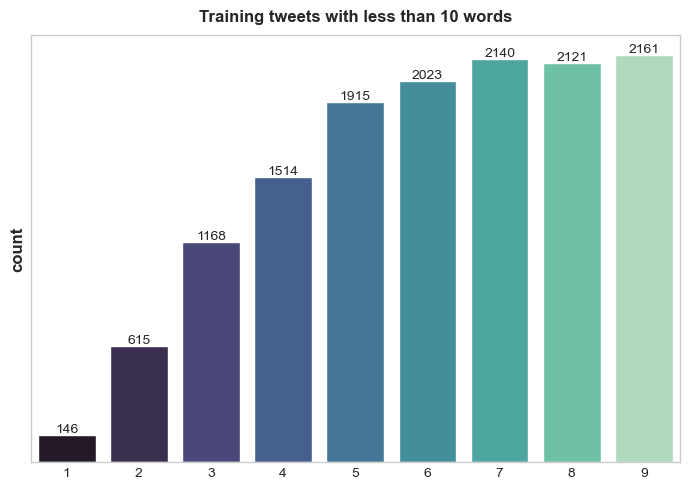

In [29]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x = 'text_len', data = df_text[df_text['text_len'] < 10], palette='mako')
plt.title('Training tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [32]:
filtered_text = df_text['clean_text'].loc[df_text['text_len'] < 5]
print(filtered_text)

800027                          USER agreed 
800047                           i am bored 
800057     uploading pictures on friendster 
800059        noodlebox with amanda tonight 
800073                       USER goodnight 
                         ...                
19925               USER sounds not working 
19939                       im going to cry 
19951                         USER no sound 
19954                         i can t dance 
19991              USER not looking hopeful 
Name: clean_text, Length: 3443, dtype: object


Although we can see some Tweets with less than 5 words convey clear sentiment they may lack the necessary context to provide meaningful insights for training a machine learning model.

As we have a large dataset, we will exclude Tweets with less than 5 words.

In [33]:
df_text = df_text[df_text['text_len'] >= 5]
print("The dataset has {} rows and {} columns".format(df_text.shape[0], df.shape[1]))

The dataset has 36557 rows and 6 columns


#### Word clouds

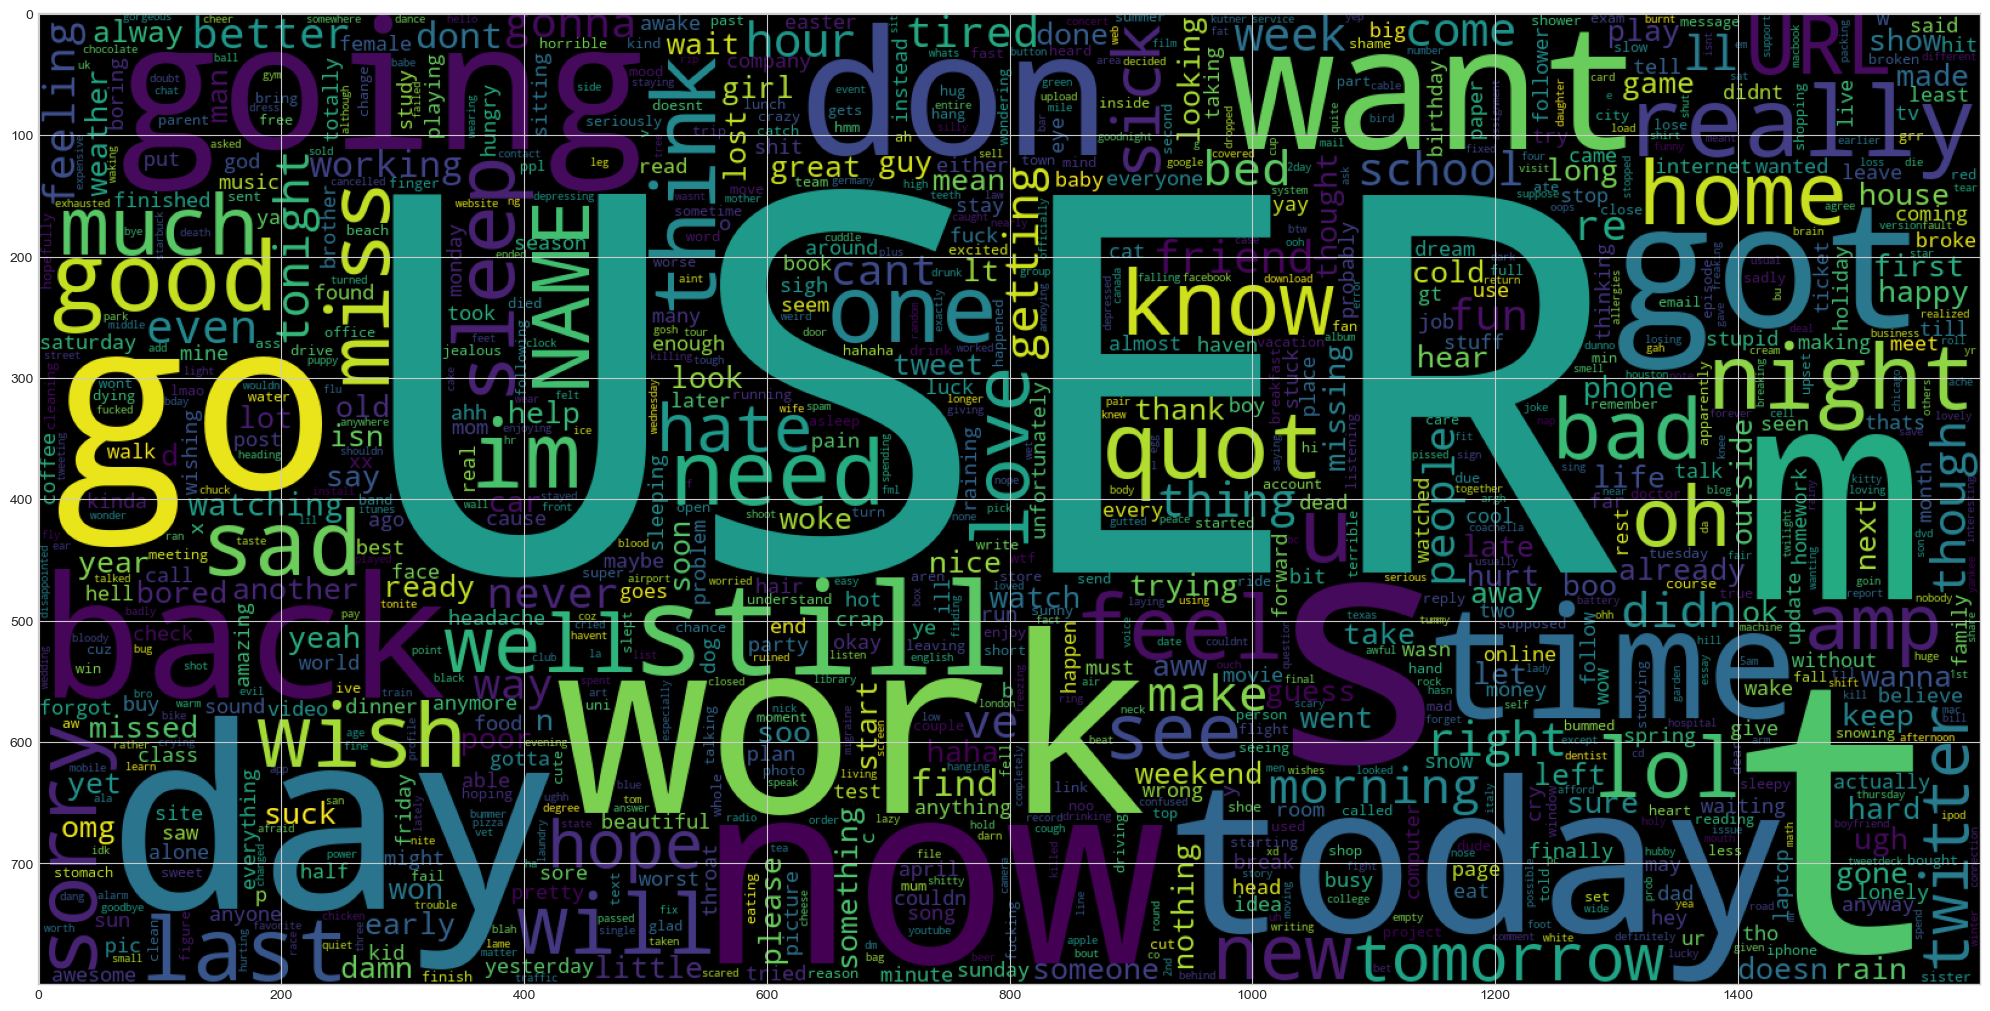

In [34]:
#!pip install wordcloud
from wordcloud import WordCloud

data_neg = df_text[df_text['sentiment'] == 'negative']['clean_text']

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

### Pre-processing

Pre-processing is an important step for the NLP process where we transform text into a more digestible form so that machine learning algorithms can perform better.

The pre-processing tasks to break down the text into pieces are: 

- tokenization: breaking text into units 
- stemming: reducing words to their base form
- lemmatization: transforming words to their dictionary form (e.g: “great” to “good”)


We are going to use the following sample text to test these methods.

In [35]:
sample_text = ("Google unveils world's most powerful supercomputer, beats OpenAI. " 
               "The Google has unveiled the world's most powerful supercomputer , " 
               "beating the previous record-holder IBM Sunway TaihuLight. With a peak performance "
               "of 200,000 trillion calculations per second, it is over twice as fast as the old Computer, "
               "which is capable of 93,000 trillion calculations per second. SUpercomputer has 4,608 servers, "
               "which reportedly take up the size of two tennis courts.")
sample_text

"Google unveils world's most powerful supercomputer, beats OpenAI. The Google has unveiled the world's most powerful supercomputer , beating the previous record-holder IBM Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as the old Computer, which is capable of 93,000 trillion calculations per second. SUpercomputer has 4,608 servers, which reportedly take up the size of two tennis courts."

#### Sentence tokenization NLTK defaults Vs. Regex

In [38]:
# Test1: Default NLTK sentence tokenization
from nltk.tokenize import sent_tokenize
sample_sentences1 = sent_tokenize(text=sample_text)

print('Total sentences in sample_text:', len(sample_sentences1))
print('Sample text sentences :-')
print(np.array(sample_sentences1))

Total sentences in sample_text: 4
Sample text sentences :-
["Google unveils world's most powerful supercomputer, beats OpenAI."
 "The Google has unveiled the world's most powerful supercomputer , beating the previous record-holder IBM Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as the old Computer, which is capable of 93,000 trillion calculations per second.'
 'SUpercomputer has 4,608 servers, which reportedly take up the size of two tennis courts.']


In [39]:
# Test2: NLTK REGEXP tokenizer
SENTENCE_TOKENS_PATTERN = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)(?<=\.|\?|\!)\s'

from nltk.tokenize import RegexpTokenizer
regex_tokenizer = RegexpTokenizer(pattern=SENTENCE_TOKENS_PATTERN, gaps=True)
sample_sentences2 = regex_tokenizer.tokenize(sample_text)

print('Total sentences in sample_text:', len(sample_sentences2))
print('Sample text sentences :-')
print(np.array(sample_sentences2))

Total sentences in sample_text: 3
Sample text sentences :-
["Google unveils world's most powerful supercomputer, beats OpenAI. The Google has unveiled the world's most powerful supercomputer , beating the previous record-holder IBM Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as the old Computer, which is capable of 93,000 trillion calculations per second.'
 'SUpercomputer has 4,608 servers, which reportedly take up the size of two tennis courts.']


The default sentence tokenization correctly detected four sentences but the Regex only detected three sentences therefore we will apply default sentence tokenization to the clean_text.

We will perform word tokenization at this point too.

(Appendix 9.1: K3, K4, S1, S2, S3)

In [40]:
from nltk.tokenize import word_tokenize

# Define the tokenization function
def tokenize_text(text):
    sentences = sent_tokenize(text)
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return [word for sublist in word_tokens for word in sublist] 

#sample_token = tokenize_text(sample_text)
#print(sample_token)

df_text['tokenized_text'] = df_text['clean_text'].apply(tokenize_text)
print(df_text['tokenized_text'].head(10))

800000               [i, love, USER, u, guys, r, the, best]
800001    [im, meeting, up, with, one, of, my, besties, ...
800002    [USER, thanks, for, the, twitter, add, sunisa,...
800003    [being, sick, can, be, really, cheap, when, it...
800004          [USER, he, has, that, effect, on, everyone]
800005    [USER, you, can, tell, him, that, i, just, bur...
800006    [USER, thans, for, your, response, ihad, alrea...
800007    [USER, i, am, so, jealous, hope, you, had, a, ...
800008    [USER, ah, congrats, mr, fletcher, for, finall...
800009    [USER, i, responded, stupid, cat, is, helping,...
Name: tokenized_text, dtype: object


#### Apply stemming Porter Vs Snowball

Reducing the words to their derived stems.

In [42]:
# Porter Stemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()

ps.stem('jumping'), ps.stem('jumps'), ps.stem('jumped'), ps.stem('another'), ps.stem('sentence')

('jump', 'jump', 'jump', 'anoth', 'sentenc')

In [43]:
# Snowball Stemmer
from nltk.stem import SnowballStemmer
ss = SnowballStemmer("english")  

ss.stem('jumping'), ss.stem('jumps'), ss.stem('jumped'), ss.stem('another'), ss.stem('sentence')

('jump', 'jump', 'jump', 'anoth', 'sentenc')

For our experiement both stemmers were able to stem "jumping","jumps" and "jumped" successfully, but the words "another" and "sentence" were cut down rather than stemmed.

On Friday 4th of March 2022, Keita, Z. (2022) initiated a poll on LinkedIn, in order to survey which text normalization technique people tend to use. The results was that 75% of voters went for Lemmatization, and the remaining 25% for Stemming [5].

Based on our experience and the results of the survey we will apply Lemmatization only. We may come back to Stemming if the model needs improving.

(Appendix 9.1: K3, K4, S1, S2, S3)

#### Apply lemmatizer

Reducing the derived words to their root form, known as lemma. The text must be tokenized before applying the lemmantizer.

In [44]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

# Define the lemmatization function
def lemm_text(data):
    """ Create a function which counts word in clean text
        Parameters: input text
        Return: lemmatized text
    """
    lemmatized_text = [lemm.lemmatize(word) for word in data]
    return lemmatized_text

#sample_lemm = lemm_text(sample_token)

df_text['lemmatized_text'] = df_text['tokenized_text'].apply(lemm_text)
print(df_text['lemmatized_text'].head(10))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chees\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


800000                [i, love, USER, u, guy, r, the, best]
800001    [im, meeting, up, with, one, of, my, besties, ...
800002    [USER, thanks, for, the, twitter, add, sunisa,...
800003    [being, sick, can, be, really, cheap, when, it...
800004           [USER, he, ha, that, effect, on, everyone]
800005    [USER, you, can, tell, him, that, i, just, bur...
800006    [USER, thans, for, your, response, ihad, alrea...
800007    [USER, i, am, so, jealous, hope, you, had, a, ...
800008    [USER, ah, congrats, mr, fletcher, for, finall...
800009    [USER, i, responded, stupid, cat, is, helping,...
Name: lemmatized_text, dtype: object


In [45]:
# Join the lemmatized words back into strings
df_text['text_ready'] = df_text['lemmatized_text'].apply(lambda x: ' '.join(x))
df_text['text_ready'].head(5)

800000                         i love USER u guy r the best
800001    im meeting up with one of my besties tonight c...
800002    USER thanks for the twitter add sunisa i got t...
800003    being sick can be really cheap when it hurt to...
800004                   USER he ha that effect on everyone
Name: text_ready, dtype: object

## Train the machine learning models

The algorithms used are:
- Random Forest
- LinearSVC
- Naive Bayes (Bernoulini and Multinomial)
- XGBoost
- Logistic Regression
- Ridge

The out-the-box models for comparison are:
- Textblob
- Vader

In [50]:
# Import Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression


### Split into Train / Test

In [47]:
X = df_text['text_ready']
y = df_text['sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  29245
Size of Test Data  7312


### Feature Extraction (TF-IDF)
Convert the text data into numerical features using TF-IDF.

In [48]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [49]:
# TF-IDF matrices
print(X_train_tfidf.toarray())
print(X_test_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Model 1: Build LinearSVC (Support Vector Classifier) model

In [51]:
# Fit the model
model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tfidf, Y_train)

LinearSVC(random_state=0, tol=1e-05)

In [52]:
# Model evaluation
Y_pred1 = model1.predict(X_test_tfidf)

print("Model 1: Accuracy Score: ", accuracy_score(Y_test, Y_pred1))
print(" ")
print(classification_report(Y_test, Y_pred1))

Model 1: Accuracy Score:  0.762308533916849
 
              precision    recall  f1-score   support

    negative       0.77      0.75      0.76      3694
    positive       0.75      0.77      0.76      3618

    accuracy                           0.76      7312
   macro avg       0.76      0.76      0.76      7312
weighted avg       0.76      0.76      0.76      7312



In [81]:
#Defining a results DataFrame 
results1 = pd.DataFrame([['LinearSVC', accuracy_score(Y_test, Y_pred1), f1_score(Y_test, Y_pred1, average='weighted')]],
                      columns=['Model', 'Accuracy Score','F1 Score'])
results1

,Model,Accuracy Score,F1 Score
0,LinearSVC,0.762309,0.762305


### Model 2: Build Naive Bayes Bernoulini model

In [59]:
# Fit the model
model2 = BernoulliNB()
model2.fit(X_train_tfidf, Y_train)

BernoulliNB()

In [60]:
# Model evaluation
Y_pred2 = model2.predict(X_test_tfidf)
print("Model 2: Accuracy Score: ", accuracy_score(Y_test, Y_pred2))
print(" ")
print(classification_report(Y_test, Y_pred2))
print(" ")
print(confusion_matrix(Y_test, Y_pred2))

Model 2: Accuracy Score:  0.7582056892778993
 
              precision    recall  f1-score   support

    negative       0.77      0.75      0.76      3694
    positive       0.75      0.77      0.76      3618

    accuracy                           0.76      7312
   macro avg       0.76      0.76      0.76      7312
weighted avg       0.76      0.76      0.76      7312

 
[[2767  927]
 [ 841 2777]]


In [82]:
results2 = pd.DataFrame([['Naive Bayes Bernoulini', accuracy_score(Y_test, Y_pred2), f1_score(Y_test, Y_pred2, average='weighted')]],
                      columns=['Model', 'Accuracy Score','F1 Score'])
results2

,Model,Accuracy Score,F1 Score
0,Naive Bayes Bernoulini,0.758206,0.758202


### Model 3: KNeighbors classifier

In [68]:
# Fit the model
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(X_train_tfidf, Y_train)

KNeighborsClassifier()

In [69]:
# Model evaluation
Y_pred3 = model3.predict(X_test_tfidf)
print("Model 3: Accuracy Score: ", accuracy_score(Y_test, Y_pred3))
print(" ")
print(classification_report(Y_test, Y_pred3))
print(" ")
print(confusion_matrix(Y_test, Y_pred3))

Model 3: Accuracy Score:  0.6630196936542669
 
              precision    recall  f1-score   support

    negative       0.64      0.76      0.69      3694
    positive       0.70      0.57      0.63      3618

    accuracy                           0.66      7312
   macro avg       0.67      0.66      0.66      7312
weighted avg       0.67      0.66      0.66      7312

 
[[2792  902]
 [1562 2056]]


In [83]:
#Defining a results DataFrame 
results3 = pd.DataFrame([['KNeighbors Classifier', accuracy_score(Y_test, Y_pred3), f1_score(Y_test, Y_pred3, average='weighted')]],
                      columns=['Model', 'Accuracy Score','F1 Score'])
results3

,Model,Accuracy Score,F1 Score
0,KNeighbors Classifier,0.66302,0.659927


### Model 4: Naive Bayes Multinomial classifier

In [75]:
from sklearn.naive_bayes import MultinomialNB

model4 = MultinomialNB()
model4.fit(X_train_tfidf, Y_train)

MultinomialNB()

In [76]:
# Model evaluation
Y_pred4 = model4.predict(X_test_tfidf)
print("Model 4: Accuracy Score: ", accuracy_score(Y_test, Y_pred4))
print(" ")
print(classification_report(Y_test, Y_pred4))
print(" ")
print(confusion_matrix(Y_test, Y_pred4))

Model 4: Accuracy Score:  0.7603938730853391
 
              precision    recall  f1-score   support

    negative       0.76      0.76      0.76      3694
    positive       0.76      0.76      0.76      3618

    accuracy                           0.76      7312
   macro avg       0.76      0.76      0.76      7312
weighted avg       0.76      0.76      0.76      7312

 
[[2817  877]
 [ 875 2743]]


In [84]:
results4 = pd.DataFrame([['Naive Bayes Multinomial', accuracy_score(Y_test, Y_pred4), f1_score(Y_test, Y_pred4, average='weighted')]],
                      columns=['Model', 'Accuracy Score','F1 Score'])
results4

,Model,Accuracy Score,F1 Score
0,Naive Bayes Multinomial,0.760394,0.760395


### Model 5: Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
model5 = LogisticRegression()
model5.fit(X_train_tfidf, Y_train)

LogisticRegression()

In [87]:
# Model evaluation
Y_pred5 = model5.predict(X_test_tfidf)
print("Model 5: Accuracy Score: ", accuracy_score(Y_test, Y_pred5))
print(" ")
print(classification_report(Y_test, Y_pred5))
print(" ")
print(confusion_matrix(Y_test, Y_pred5))

Model 5: Accuracy Score:  0.775574398249453
 
              precision    recall  f1-score   support

    negative       0.78      0.77      0.78      3694
    positive       0.77      0.78      0.78      3618

    accuracy                           0.78      7312
   macro avg       0.78      0.78      0.78      7312
weighted avg       0.78      0.78      0.78      7312

 
[[2842  852]
 [ 789 2829]]


In [85]:
results5 = pd.DataFrame([['Logistic Regression', accuracy_score(Y_test, Y_pred5), f1_score(Y_test, Y_pred5, average='weighted')]],
                      columns=['Model', 'Accuracy Score','F1 Score'])
results5

,Model,Accuracy Score,F1 Score
0,Logistic Regression,0.775574,0.775578


### Out-the-box models for comparison:
- TextBlob
- Vader

#### Method 1: TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
data_neg = df_text[df_text['sentiment'] == 'negative']['clean_text']

df_text['scores'] = TextBlob(text_ready).sentiment.subjectivity
df_text['scores']TextBlob(text_ready).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 tweet[‘TextBlob_Subjectivity’] =    tweet[‘tweet’].apply(getSubjectivity)
 tweet [‘TextBlob_Polarity’] = tweet[‘tweet’].apply(getPolarity)
 
def getAnalysis(score):
    if score < 0:
    return ‘Negative’
  elif score == 0:
    return ‘Neutral’
  else:
    return ‘Positive’

tweet [‘TextBlob_Analysis’] = tweet  [‘TextBlob_Polarity’].apply(getAnalysis )
return tweet

#### Method 2: VADAR

In [89]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chees\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
top_records['scores'] = top_records['clean_text'].apply(lambda review: sid.polarity_scores(review))
top_records.head()

In [ ]:
top_records['compound'] = top_records['scores'].apply(lambda score_dict: score_dict['compound'])
top_records.head()

In [ ]:
top_records['comp_score'] = top_records['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
top_records.head()

Unfortunately I have been unable to process the TextBlob and VADAR models.

The results of TextBlob [5] and VADER [4] analysis seem to be very encouraging. The results of this publication show the advantages which will be attained by the utilisation of either in cases of Twitter where text data could be a complex mixture of a range of text and languages.

### Results

In [86]:
results = pd.concat([results1, results2, results3, results4, results5], ignore_index=True)
results

,Model,Accuracy Score,F1 Score
0,LinearSVC,0.762309,0.762305
1,Naive Bayes Bernoulini,0.758206,0.758202
2,KNeighbors Classifier,0.663020,0.659927
3,Naive Bayes Multinomial,0.760394,0.760395
4,Logistic Regression,0.775574,0.775578


The final results after implementing the NLP pipeline along with the evaluation of the proposed approach shows that the Logistic Regression performed the best Machine Learning model.

We were unable to compare this result to the out of the box models.

## Discussion and conclusion

We have been able to explore the different sentiment analysis techniques for classifying the **Sentiment140 dataset** obtained from Kaggle. The dataset containing tweets was cleaned before being converted to an array of tokens. With a precision of 0.78, recall of 0.78, and F1 score of 0.7756, the result reveals that **Logistic Regression** model has the highest overall score. 

Considering the training dataset had no neural sentiment (and does not exist in the model), we have been able to get a good result however to better understand whether the chosen model predicts the classifications as accurately as this study we would need to run the model through a new dataset and produce the confusion matrix to analyse the results.

When comparing to a published methods using a similar sentiment classification approach, the accuracy has been higher 97.3% which suggests that further work can be done to improve the result [1]. 

Some suggestions to improve the result:
- removing appropriate stop words
- consider reviewing the stemming performance
- converting chat words (slang, abbreviations, and informal language) like "u" becomes "you" and "gr8" becomes "great"
- feature engineering such as n-grams
- using Grid Search CV to fine tune the model
- revisit the out of the box models
- try TRANSFORMER libraries such as BERT and FORMER


In conclusion, we have been able to apply sentiment analysis techniques to develop and test models to classify the text into two categories, positive and negative. The measures to assess the best model in this experiment, which used a single dataset for each method, were accuracy and F1 score.


(Appendix 9.1: K5, S4, S8, B1, B6)

## References

[1] Anon, (2022). What is a Tweet - Definition, meaning and examples. [online] Available at: https://www.arimetrics.com/en/digital-glossary/tweet.


[2] KDnuggets. (n.d.). Natural Language Processing Pipelines, Explained. [online] Available at: https://www.kdnuggets.com/2021/03/natural-language-processing-pipelines-explained.html.


[3] Puma, C., Roma, W., Luque, P. and Bladimir, E. (n.d.). COMPARATIVE ANALYSIS OF LIBRARIES FOR THE SENTIMENTAL ANALYSIS. [online] Available at: https://arxiv.org/pdf/2307.14311#:~:text=In%20this%20study%2C%20a%20comparison%20of%20various%20libraries [Accessed 5 Jun. 2024].

[4] Beri, A. (2020). SENTIMENTAL ANALYSIS USING VADER. [online] Medium. Available at: https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664.


[5] https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

[6] Keita, Z. (2022). Stemming, Lemmatization— Which One is Worth Going For? Medium. [online] 7 Mar. Available at: https://towardsdatascience.com/stemming-lemmatization-which-one-is-worth-going-for-77e6ec01ad9c [Accessed 26 Apr. 2022].


[7] kaggle.com. (n.d.). Twitter Sentiment Analysis Custom Model. [online] Available at: https://www.kaggle.com/code/slythe/twitter-sentiment-analysis-custom-model [Accessed 6 Jun. 2024].

‌

## Appendix

### Knowledge, Skills and Behaviours


K1. The context of Data Science and the Data Science community in relation to computer science, statistics and software engineering. How differing schools of thought in these disciplines have driven new approaches to data systems.

K2. How Data Science operates within the context of data governance, data security, and communications. How Data Science can be applied to improve an organisation’s processes, operations and outputs. How data and analysis may exhibit biases and prejudice.  How ethics and compliance aect Data Science work, and the impact of international regulations (including the General Data Protection Regulation.)

K3. How data can be used systematically, through an awareness of key platforms for data and analysis
in an organisation, including:
1. Data processing and storage, including on-premise and cloud technologies. 
2. Database systems including relational, data warehousing & online analytical processing, “NoSQL” and real-time approaches; the pros and cons of each approach.
3. Data-driven decision making and the good use of evidence and analytics in making choices and decisions.

K5. The data landscape: how to critically analyse, interpret and evaluate complex information from diverse datasets:
1. Sources of data including but not exclusive to les, operational systems, databases, web services, open data, government data, news and social media.
2. Data formats, structures and data delivery methods including “unstructured” data.
3. Common patterns in real-world data.

S1. Identify and clarify problems an organisation faces, and reformulate them into Data Science problems. Devise solutions and make decisions in context by seeking feedback from stakeholders. Apply scientic methods through experiment design, measurement, hypothesis testing and delivery of results.  Collaborate with colleagues to gather requirements.

S2. Perform data engineering: create and handle datasets for analysis. Use tools and techniques to source, access, explore, prole, pipeline, combine, transform and store data, and apply governance (quality control, security, privacy) to data.

S3. Identify and use an appropriate range of programming languages and tools for data manipulation, analysis, visualisation, and system integration. Select appropriate data structures and algorithms for the problem.  Develop reproducible analysis and robust code, working in accordance with software
development standards, including security, accessibility, code quality and version control.

S4. Use analysis and models to inform and improve organisational outcomes, building models and validating results with statistical testing: perform statistical analysis, correlation vs causation, feature selection and engineering, machine learning, optimisation, and simulations, using the appropriate techniques for the problem.

S5. Implement data solutions, using relevant software engineering architectures and design patterns. Evaluate Cloud vs. on-premise  eployment.  Determine the implicit and explicit value of data. Assess
value for money and Return on Investment.  Scale a system up/out. Evaluate emerging trends and new approaches. Compare the pros and cons of software applications and techniques.

S8. Use project delivery techniques and tools appropriate to their Data Science project and organisation. Plan, organise and manage resources to successfully run a small Data Science project, achieve organisational goals and enable eective change.

B1. An inquisitive approach: the curiosity to explore new questions, opportunities, data, and techniques; tenacity to improve methods and maximise insights; and relentless creativity in their approach to solutions.

B6. A commitment to keeping up to date with current thinking and maintaining personal development. Including collaborating with the data science community.

## Out of the box models

- TextBlob is a python library for Natural Language Processing (NLP). TextBlob actively used Natural Language ToolKit (NLTK) to achieve its tasks. NLTK is a library which gives an easy access to a lot of lexical resources and allows users to work with categorisation, classification and many other tasks. TextBlob is a simple library which supports complex analysis and operations on textual data. [5]


- VADER (Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK (Natural Language Toolkit) package and can be applied directly to unlabelled text data [4].

=== END ===